<a href="https://colab.research.google.com/github/soumikchandra-ai/ANN-Model/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()  #This shows imbalance dataset

,count
Exited,
0,7963
1,2037


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#One Hot encoding for columns=['Geography','Gender']

df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
#Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(8000, 11)

In [17]:
import tensorflow

In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [22]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.8052
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6080
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5148
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4813
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4672
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4577
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4451
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - loss: 0.4369
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4405
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338  


In [23]:
model.layers[0].get_weights()

[array([[ 0.15138236, -0.25854623,  0.317486  ],
        [-0.8892625 ,  0.92960685,  1.4642147 ],
        [-0.00207248, -0.08071289, -0.18110631],
        [-0.39197588,  0.3218845 , -0.23904331],
        [-0.17964295, -0.9369972 ,  0.01299453],
        [-0.01578266,  0.04511837, -0.3054771 ],
        [ 0.55710137, -0.74073404, -0.6904664 ],
        [ 0.10940754,  0.03279066,  0.38891685],
        [-0.64857686, -0.18354799,  0.4852854 ],
        [ 0.03990903, -0.02645638,  0.27497783],
        [ 0.38954425, -0.32105207, -0.3707257 ]], dtype=float32),
 array([ 0.8342907, -0.6353218, -0.5662649], dtype=float32)]

In [24]:
model.layers[1].get_weights()

[array([[-1.897586  ],
        [ 0.66450614],
        [ 0.62546515]], dtype=float32),
 array([-0.7641936], dtype=float32)]

In [25]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [26]:
#We define the threshold here that above which value of y_log we classify the point as 1 otherwise 0
y_pred=np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8095

In [28]:
#Finding the best thresold
i=0.5
for i in np.arange(0,1,0.1):
  y_pred=np.where(y_log>i,1,0)
  print(accuracy_score(y_test,y_pred))

0.2075
0.4065
0.719
0.791
0.801
0.8095
0.794
0.7925
0.7925
0.7925


#Changes that can be done to increase the efficiency

In [29]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6104 - loss: 0.6501 - val_accuracy: 0.8000 - val_loss: 0.5040
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4781 - val_accuracy: 0.8112 - val_loss: 0.4511
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4421 - val_accuracy: 0.8156 - val_loss: 0.4301
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.4303 - val_accuracy: 0.8225 - val_loss: 0.4187
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.4076 - val_accuracy: 0.8275 - val_loss: 0.4112
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.4137 - val_accuracy: 0.8269 - val_loss: 0.4047
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.3876 - val_accuracy: 0.8388 - val_loss: 0.3941
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 0.3882 - val_accu

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830 (3.25 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 554 (2.17 KB)

In [33]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
y_pred=np.where(y_log>0.5,1,0)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

#Important Graphs

In [36]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3162 - val_accuracy: 0.8519 - val_loss: 0.3492
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.3086 - val_accuracy: 0.8506 - val_loss: 0.3478
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3127 - val_accuracy: 0.8556 - val_loss: 0.3476
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3250 - val_accuracy: 0.8531 - val_loss: 0.3484
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss: 0.3098 - val_accuracy: 0.8556 - val_loss: 0.3464
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3121 - val_accuracy: 0.8550 - val_loss: 0.3496
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3228 - val_accuracy: 0.8525 - val_loss: 0.3494
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3117 - val_accu

In [37]:
import matplotlib.pyplot as plt

In [38]:
history

In [39]:
history.history #This is a dictionary of values as [accuracy,loss,val_acc,val_loss]

{'accuracy': [0.8685937523841858,
  0.8684375286102295,
  0.8690624833106995,
  0.8684375286102295,
  0.8673437237739563,
  0.8681250214576721,
  0.8675000071525574,
  0.8673437237739563,
  0.8689062595367432,
  0.8700000047683716,
  0.8687499761581421,
  0.8701562285423279,
  0.8690624833106995,
  0.8714062571525574,
  0.8682812452316284,
  0.8698437213897705,
  0.8696874976158142,
  0.87109375,
  0.8707812428474426,
  0.8693749904632568,
  0.8700000047683716,
  0.8695312738418579,
  0.871874988079071,
  0.8706250190734863,
  0.8698437213897705,
  0.8693749904632568,
  0.8707812428474426,
  0.8707812428474426,
  0.87109375,
  0.8709375262260437,
  0.8693749904632568,
  0.8707812428474426,
  0.8701562285423279,
  0.8700000047683716,
  0.87109375,
  0.8693749904632568,
  0.8687499761581421,
  0.8715624809265137,
  0.870312511920929,
  0.8712499737739563,
  0.8704687356948853,
  0.8712499737739563,
  0.8715624809265137,
  0.8720312714576721,
  0.8701562285423279,
  0.8712499737739563,
  

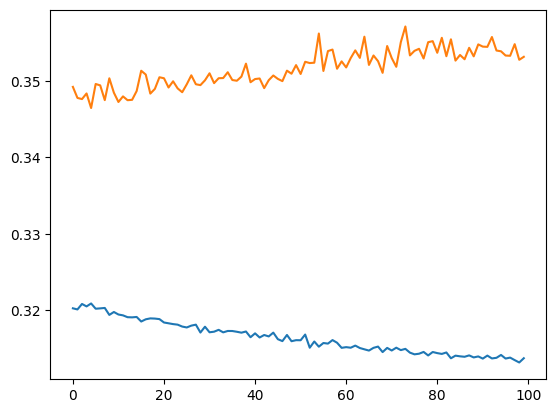

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

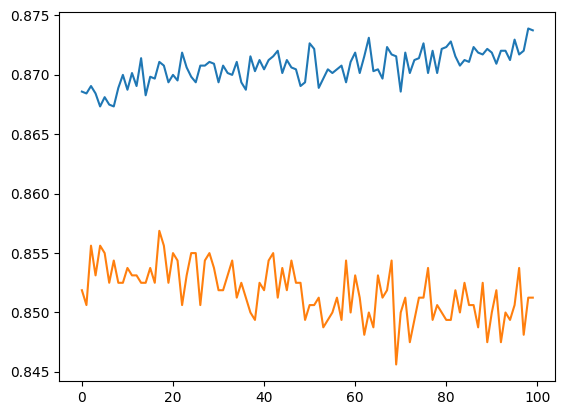

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])